In [1]:
!pip install causal-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 2.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz

# 1️⃣ 요인(Factor) 데이터 생성 (A, B, C, D, E) -> 결과 (Y)

# 요인 변수들
A = np.array([1, 1, 1, 1, 1, 1,
              0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0])
B = np.array([1, 0, 1, 0, 1, 1,
              1, 1, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0])
C = np.array([1, 1, 1, 0, 0, 0,
              0, 1, 0, 1, 1, 1,
              0, 1, 0, 1, 1, 0,
              0, 1, 1, -1, 0, 0])
D = np.array([-1, -1, 0, 1, 1, -1,
              1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1])
E = np.array([1, -1, 1, 0, 1, 1,
              0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0])

# 결과 변수 (Y)
Y = np.array([224.59, 219.11, 216.73, 205.53, 200.57, 198.22,
              193.20, 186.32, 183.25, 174.53, 173.33, 170.98,
              168.98, 168.30, 154.21, 149.48, 148.44, 147.36,
              147.15, 143.84, 142.97, 136.42, 134.54, 125.00])

def min_max_normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

normalized_arr = min_max_normalize(Y)

# 데이터프레임으로 변환
data = pd.DataFrame({"A": A, "B": B, "C": C,
                     "D": D, "E": E, "Y": Y})

# 2️⃣ FCI 알고리즘 적용
fci_graph, edges = fci(data.to_numpy(), independence_test_method = fisherz)
print(fci_graph)

  0%|          | 0/6 [00:00<?, ?it/s]

Graph Nodes:
X1;X2;X3;X4;X5;X6

Graph Edges:
1. X1 o-o X4
2. X1 o-o X6
3. X2 o-o X5



  0%|          | 0/6 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



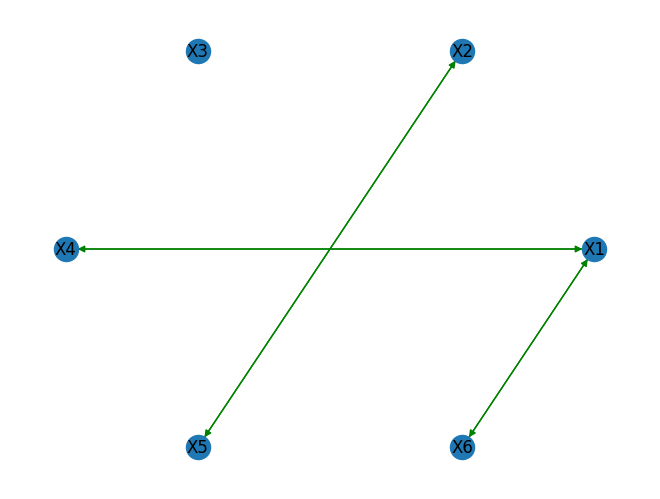

In [7]:
# 3️⃣ PC 알고리즘 적용 및 시각화
from causallearn.search.ConstraintBased.PC import pc

cg = pc(data.values)

cg.to_nx_graph()
cg.draw_nx_graph(skel = False)